#### Now we want to analyze the data we have and see its shape

##### Importing Matplotlib and Seaborn for data visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

pd.set_option('display.max_columns', None)

##### Now we want to import the data we extracted

In [2]:
df = pd.read_csv("training_data.csv")
df.tail()

,سعر,شركة,موديل,سنة,لون السيارة,نوع الوقود,أصل السيارة,رخصة السيارة,نوع الجير,الزجاج,قوة الماتور,عداد السيارة,عدد الركاب,وسيلة الدفع,معروضة,أصحاب سابقون,إضافات
6859,45000,كيا,مورننغ,2015,فيراني,كهرباء,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1000,130000,4+1,إمكانية التقسيط,للبيع فقط,2,مُكيّف إغلاق مركزي جهاز إنذار جنطات مغنيسيوم و...
6860,48000,فورد,ترانزيت,2002,أبيض,ديزل,عمومي,فلسطينية,عادي,الكتروني,2400,00000,7+1,نقدا فقط,للبيع فقط,5,هيئة جديدة شفه امامية فحص شصيات بلاطة وغيره مم...
6861,87000,بيجو,بارتنر,2018,فضي,ديزل,خصوصي,فلسطينية,عادي,الكتروني,1600,50000,4+1,نقدا فقط,للبيع فقط,يد صفر,مُكيّف إغلاق مركزي جهاز إنذار مسجل CD وسادة حم...
6862,126000,كيا,سورينتو,2017,بترولي,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2200,100,6+1,نقدا فقط,للبيع فقط,ثانيه,مُكيّف إغلاق مركزي جهاز إنذار مسجل CD فتحة سقف...
6863,28000,فولكسفاجن,ترانسبورتر,2001,أبيض,ديزل,عمومي,فلسطينية,عادي,الكتروني,2500,7686866,7+1,نقدا فقط,للبيع أو التبديل,خامسة,مُكيّف إغلاق مركزي مسجل CD السيارة صلاة النبي ...


##### The one thing that stands out from the above table is the "إضافات" column which seems to have a good chuck of information that we can use, we'll keep that in mind, and the other things are that some columns have a diverse collection of unique values that are different but have the same meaning, some values are "1,يد اولى" which mean the same thing, so we would keep that in mind, and other columns have the same as this issue

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6864 entries, 0 to 6863
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   سعر           6864 non-null   int64 
 1   شركة          6864 non-null   object
 2   موديل         6819 non-null   object
 3   سنة           6864 non-null   int64 
 4   لون السيارة   6864 non-null   object
 5   نوع الوقود    6864 non-null   object
 6   أصل السيارة   6864 non-null   object
 7   رخصة السيارة  6864 non-null   object
 8   نوع الجير     6864 non-null   object
 9   الزجاج        6864 non-null   object
 10  قوة الماتور   6864 non-null   int64 
 11  عداد السيارة  4923 non-null   object
 12  عدد الركاب    6087 non-null   object
 13  وسيلة الدفع   6864 non-null   object
 14  معروضة        6864 non-null   object
 15  أصحاب سابقون  5214 non-null   object
 16  إضافات        6641 non-null   object
dtypes: int64(3), object(14)
memory usage: 911.8+ KB


##### Now we want to see the percentage of null values in each column

In [4]:
(df.isnull().sum()/(len(df)))*100

سعر              0.000000
شركة             0.000000
موديل            0.655594
سنة              0.000000
لون السيارة      0.000000
نوع الوقود       0.000000
أصل السيارة      0.000000
رخصة السيارة     0.000000
نوع الجير        0.000000
الزجاج           0.000000
قوة الماتور      0.000000
عداد السيارة    28.277972
عدد الركاب      11.319930
وسيلة الدفع      0.000000
معروضة           0.000000
أصحاب سابقون    24.038462
إضافات           3.248834
dtype: float64

##### As we can see above the columns "عداد السيارة", "عدد الركاب" and "أصحاب سابقون"  Stand out having a good chunk of null values in them we need to keep that in mind as it would affect the alogorithms we're going to use later

##### The above mentioned issues have been addressed in the feature_improving notbook
### Now we want to see the improved training data and visualize it to understand more of what we have to do, and continue furthur improvments

##### Let's read the improved data

In [5]:
df = pd.read_csv("improved_training_data.csv")
columns_names_arabic_english = {
    "سعر":"Price",
    "شركة":"Brand",
    "موديل":"Model",
    "سنة":"Year",
    "لون السيارة":"Color",
    "نوع الوقود":"Fuel_Type",
    "أصل السيارة":"Vehicle_History",
    "رخصة السيارة":"Licence",
    "نوع الجير":"Transmission_Type",
    "الزجاج":"Windows_Type",
    "قوة الماتور":"Engine_Capacity",
    "عداد السيارة":"Kilometers_Driven",
    "عدد الركاب":"Seats",
    "وسيلة الدفع":"Payment_Method",
    "معروضة":"Listed_For",
    "أصحاب سابقون":"Previous_Owners",
    "مسجل":"Radio",
    "CD":"CD",
    "مُكيّف":"Air_Conditioner",
    "إغلاق مركزي":"Central_Lock",
    "وسادة هوائية":"Airbag",
    "جنطات مغنيسيوم":"Magnesium_Rims",
    "جهاز إنذار":"Alert_System",
    "فرش جلد":"Leather_Seats",
    "فتحة سقف":"Sunroof"
}

#### The first thing i want to change are the columns names, should've changed them before and renamed them in english but whatever, better be late than never

In [6]:
df = df.rename(columns=columns_names_arabic_english)

##### Now i wanna see if we have null values in the data

In [7]:
df.isna().sum()

Price                 0
Brand                 0
Model                45
Year                  0
Color                 0
Fuel_Type             0
Vehicle_History       0
Licence               0
Transmission_Type     0
Windows_Type          0
Engine_Capacity       0
Kilometers_Driven     0
Seats                 0
Payment_Method        0
Listed_For            0
Previous_Owners       0
Radio                 0
CD                    0
Air_Conditioner       0
Central_Lock          0
Airbag                0
Magnesium_Rims        0
Alert_System          0
Leather_Seats         0
Sunroof               0
dtype: int64

##### As we can see from the above breakdown, the "Model" column has a few null values, and i don't see any better way to deal with them but by removing them, the "Model" column is a very vital feature in a cars price, in which keeping the null values would damage the resulting model badly. We'll deal with it right now

In [8]:
df = df.drop(df[df["Model"].isna()].index)
df["Model"].unique()

array(['اوبتيما', 'سورينتو', 'افانتي', '127', '208', 'ام', 'كورسا',
       'C200', 'فيستا', 'باترول', 'ترانزيت', '206+', 'فابيا', '1998',
       'برايد', 'بارتنر', 'كادي', 'اكورد', 'اسكونا', 'سانتافيه',
       'الانترا', 'i30', 'توسان', 'رابيد', 'i40', 'اوكتافيا', 'فورتي',
       'كاديت', 'اكسنت', 'بولو', 'لانوس', 'توران', 'اوبترا', 'رايسر',
       'R9', 'فيتو', 'شيروكي', 'كرافيل', 'جيتس', 'جولف', 'باسات',
       'ترانسبورتر', 'زافيرا', 'سوبيرب', 'بيكانتو', 'فوكس', 'نوبيرا',
       'افيو', 'نارية', '305', 'كسارا', 'كليك', 'i25', '307', 'CC',
       'ماتيز', '220', 'FH', 'أوميغا', 'ريو', 'استرا', 'R5', '6',
       'ليجانزا', 'سبورتاج', 'طوارق', 'تروبر', 'يونغ', 'ابيزا', 'دوبلو',
       'C250', '206', 'كونيكت', 'فيرنا', '2000', 'كورولا', 'ليون', 'i20',
       'عريض', 'نملة', 'GTI', 'تيندرا', 'ix35', '200', 'C-Elysee',
       'S350Long', '614', 'بيتل', 'سيفيك', 'كليو', 'باجيرو', '205',
       'S320', 'E300', 'باندا', '250', 'بيكاسو', 'بورا', 'LT', 'كبينة',
       '410', 'H1', '207', 'كاري

##### Now from the above i can see some values that are not what a car modle should be, some are years and some are nmubers, the way i see it, the ones written in numbers and have 4 digits, i am going to compare them to the year column, if they were the same value, i'll just drop the row, the first step is to convert the arabic numbers to english ones

In [9]:
arabic_numbers = '٠١٢٣٤٥٦٧٨٩'
english_numbers = '0123456789'
translate_arabic_numbers = str.maketrans(arabic_numbers, english_numbers)
df["Model"] = df["Model"].str.translate(translate_arabic_numbers)

In [10]:
df["Model_Is_Year"] =  df["Model"] == df["Year"].astype("string")
df = df[df['Model_Is_Year'] != True]
df = df.drop(columns=["Model_Is_Year"]).reset_index(drop=True)

In [11]:
df["Model"].unique()

array(['اوبتيما', 'سورينتو', 'افانتي', '127', '208', 'ام', 'كورسا',
       'C200', 'فيستا', 'باترول', 'ترانزيت', '206+', 'فابيا', 'برايد',
       'بارتنر', 'كادي', 'اكورد', 'اسكونا', 'سانتافيه', 'الانترا', 'i30',
       'توسان', 'رابيد', 'i40', 'اوكتافيا', 'فورتي', 'كاديت', 'اكسنت',
       'بولو', 'لانوس', 'توران', 'اوبترا', 'رايسر', 'R9', 'فيتو',
       'شيروكي', 'كرافيل', 'جيتس', 'جولف', 'باسات', 'ترانسبورتر',
       'زافيرا', 'سوبيرب', 'بيكانتو', 'فوكس', 'نوبيرا', 'افيو', 'نارية',
       '305', 'كسارا', 'كليك', 'i25', '307', 'CC', 'ماتيز', '220', 'FH',
       'أوميغا', 'ريو', 'استرا', 'R5', '6', 'ليجانزا', 'سبورتاج', 'طوارق',
       'تروبر', 'يونغ', 'ابيزا', 'دوبلو', 'C250', '206', 'كونيكت',
       'فيرنا', 'كورولا', 'ليون', 'i20', 'عريض', 'نملة', 'GTI', 'تيندرا',
       'ix35', '200', 'C-Elysee', 'S350Long', '614', 'بيتل', 'سيفيك',
       'كليو', 'باجيرو', '205', 'S320', 'E300', 'باندا', '250', 'بيكاسو',
       'بورا', 'LT', 'كبينة', '410', 'H1', '207', 'كاريزما', 'سيراتو',
       

In [12]:
df.isna().sum()

Price                0
Brand                0
Model                0
Year                 0
Color                0
Fuel_Type            0
Vehicle_History      0
Licence              0
Transmission_Type    0
Windows_Type         0
Engine_Capacity      0
Kilometers_Driven    0
Seats                0
Payment_Method       0
Listed_For           0
Previous_Owners      0
Radio                0
CD                   0
Air_Conditioner      0
Central_Lock         0
Airbag               0
Magnesium_Rims       0
Alert_System         0
Leather_Seats        0
Sunroof              0
dtype: int64

##### Now we're good, no Null values
##### And there is also one thing i wanna see, is if there're any duplicated rows, which is something we don't need and we can get rid of the duplicated ones

In [13]:
df.loc[df.duplicated()]

,Price,Brand,Model,Year,Color,Fuel_Type,Vehicle_History,Licence,Transmission_Type,Windows_Type,Engine_Capacity,Kilometers_Driven,Seats,Payment_Method,Listed_For,Previous_Owners,Radio,CD,Air_Conditioner,Central_Lock,Airbag,Magnesium_Rims,Alert_System,Leather_Seats,Sunroof
269,69000,اوبل,كورسا,2016,أسود ميتالك,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1400,40000.0,5,نقدا فقط,للبيع فقط,0,1,1,1,1,1,1,1,0,0
892,19000,دايو,ماتيز,2002,ذهبي,بنزين,خصوصي,فلسطينية,عادي,الكتروني,800,216367.0,4,نقدا فقط,للبيع فقط,2,1,1,1,1,1,1,1,0,0
2718,70000,فولكسفاجن,جولف,2009,أحمر,بنزين,خصوصي,فلسطينية,عادي,الكتروني,1600,147000.0,5,إمكانية التقسيط,للبيع أو التبديل,1,1,1,1,1,1,1,1,0,1
3243,31000,سكودا,فابيا,2003,أبيض,ديزل,عمومي,فلسطينية,عادي,الكتروني,1900,452795.0,5,نقدا فقط,للبيع فقط,2,0,0,0,1,0,1,0,0,0
4414,99900,هونداي,كونا,2020,فيراني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600,20000.0,5,نقدا فقط,للبيع أو التبديل,0,1,1,1,1,1,1,1,1,0


##### As we can see, we have a few duplicated rows, so i am going to straight up remove them, and i also wanna reset the index so its more organized

In [14]:
df = df.drop_duplicates().reset_index(drop=True)
df.shape

(6736, 25)

##### We have 25 features, so lets check their stats

In [15]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Price,6736.0,NaN,NaN,NaN,66987.949525,57029.704268,1111.0,36000.0,55000.0,83000.0,999999.0
Brand,6736,39,فولكسفاجن,1154,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Model,6736,401,اوكتافيا,501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,6736.0,NaN,NaN,NaN,2008.654394,8.694104,1967.0,2005.0,2011.0,2015.0,2022.0
Color,6736,26,أبيض,1411,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fuel_Type,6736,4,بنزين,3917,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle_History,6736,6,خصوصي,5740,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Licence,6736,2,فلسطينية,6663,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission_Type,6736,3,اوتوماتيك,3572,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Windows_Type,6736,2,الكتروني,6224,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### From the above describtion i can see that the "Kilometers_Driven" and the "Previous_Owners" columns have some outliers which messed up the mean and the standard deviation values, i'll keep an eye on that

##### To have a better understanding of the data we can visualize it, but first lets remove the id column and seperate the numerical and categorical features

In [16]:
categorical_cols=df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
binary_features = ["Sunroof","Leather_Seats","Alert_System","Magnesium_Rims","Airbag","Central_Lock","Air_Conditioner","Radio","CD"]
for bf in binary_features: numerical_cols.remove(bf)
print("Categorical Variables:")
print(categorical_cols)
print("Numerical Variables:")
print(numerical_cols)

Categorical Variables:
Index(['Brand', 'Model', 'Color', 'Fuel_Type', 'Vehicle_History', 'Licence',
       'Transmission_Type', 'Windows_Type', 'Payment_Method', 'Listed_For'],
      dtype='object')
Numerical Variables:
['Price', 'Year', 'Engine_Capacity', 'Kilometers_Driven', 'Seats', 'Previous_Owners']


Price
Skew : 5.04


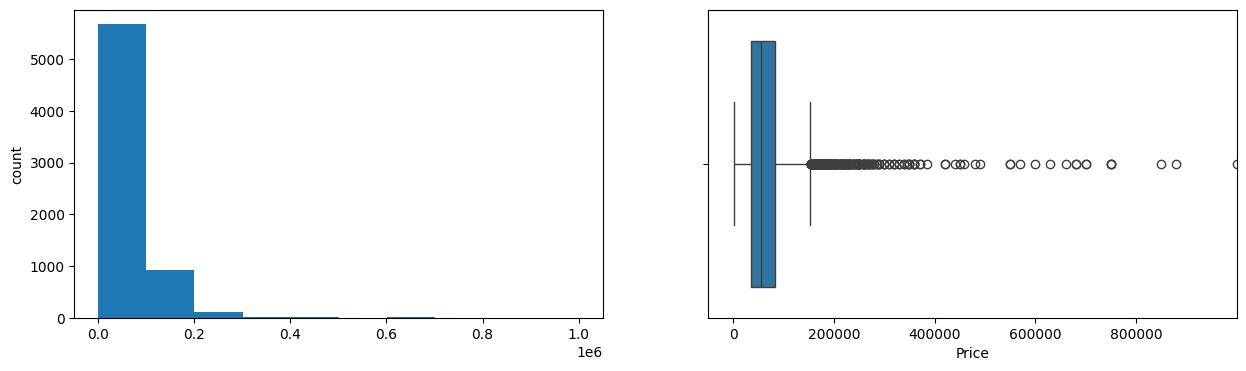

Year
Skew : -1.34


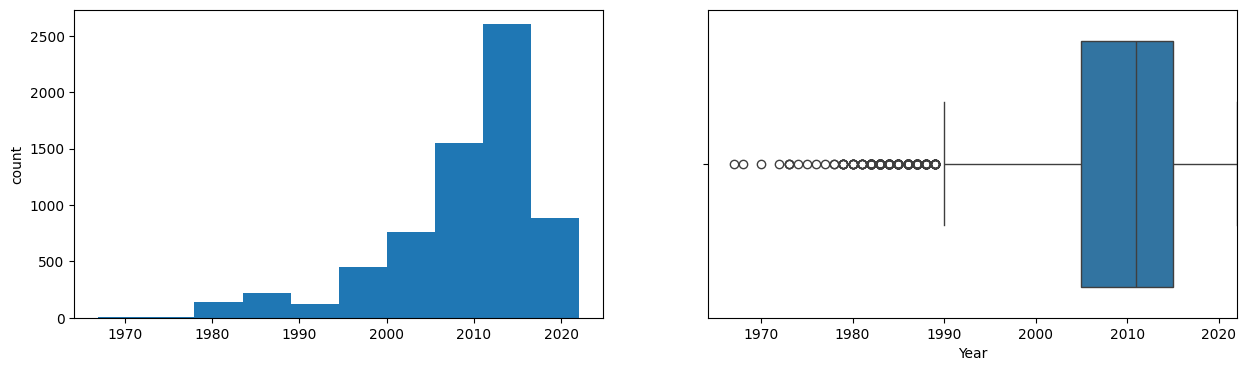

Engine_Capacity
Skew : 2.71


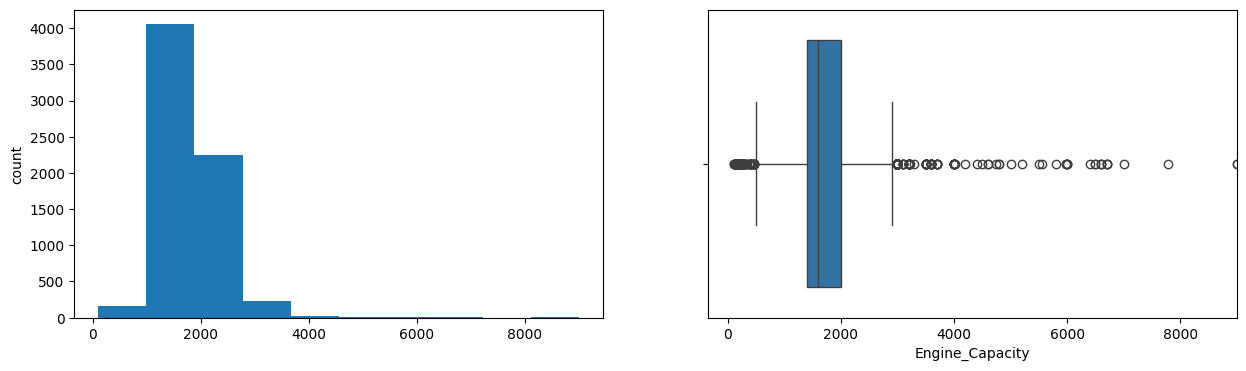

Kilometers_Driven
Skew : 82.07


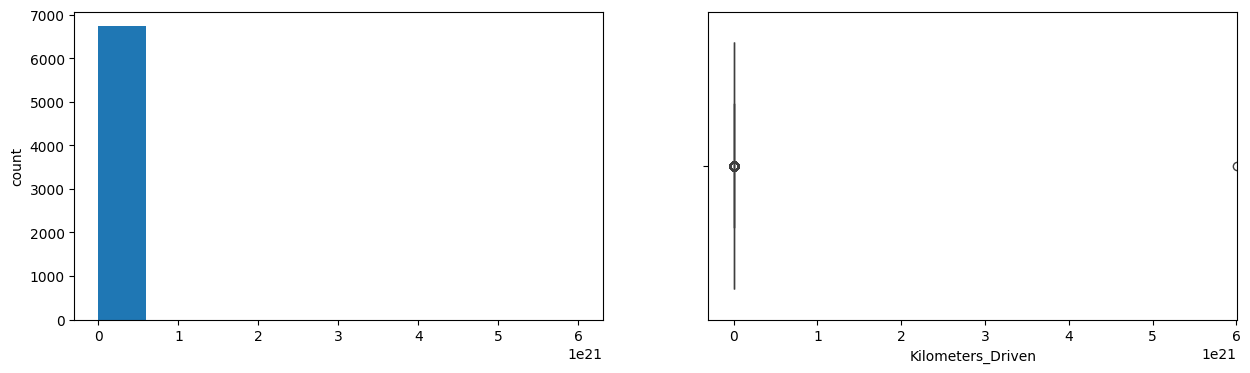

Seats
Skew : 42.01


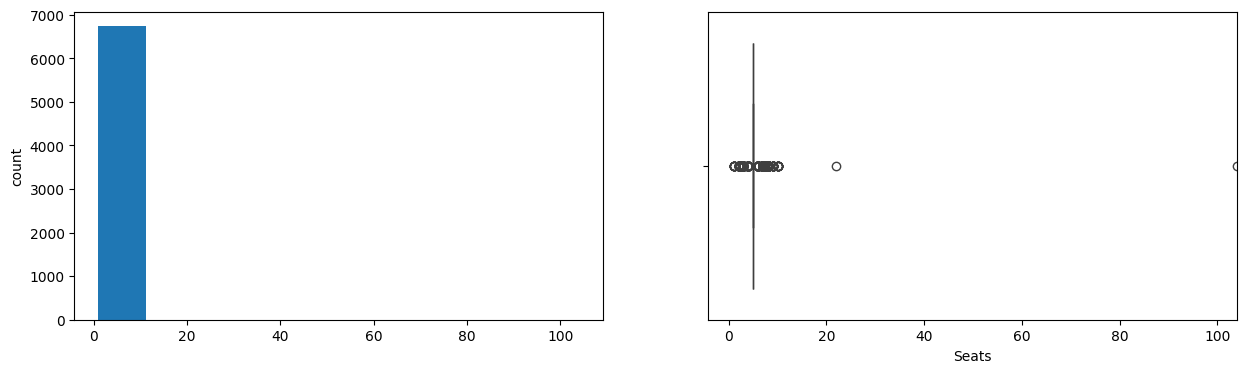

Previous_Owners
Skew : 82.07


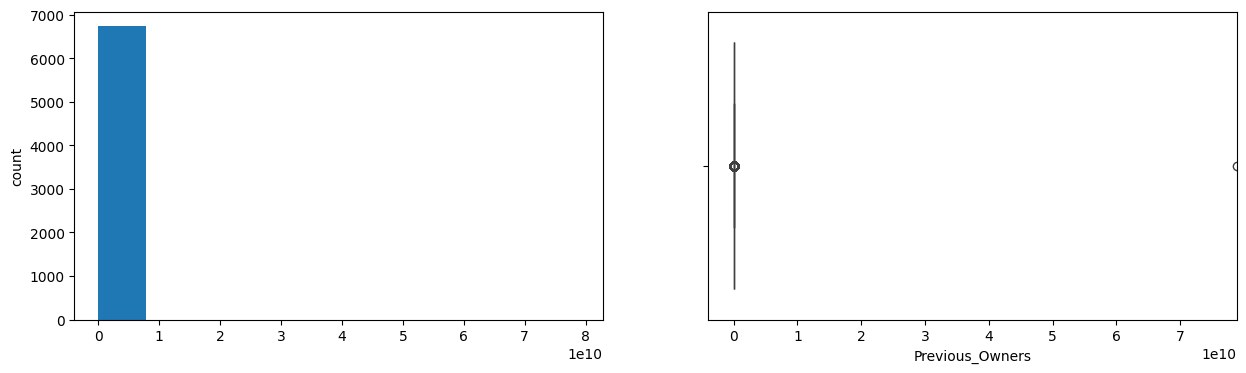

In [17]:
for col in numerical_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.xlim(right=df[col].max())
    plt.show()

##### We can see from the above plots that the "Previous Owners", "Kilometers Driven" and "Seats" are skewed to the right so much we need to take care of the outliers they have

#### Now i wanna see if some features are linked to another or have some kind of relationship between them

##### First i belive that the CD column and Radio column mean the same thing, so i am going to see if thats true in the data, and if so delete the one of them, preferably the CD column

In [18]:
count = (df['CD'] == df['Radio']).sum()
percentage = (count / len(df)) * 100
percentage

99.48040380047506

##### This shows that the CD and Radio columns have the same values thus the same meaning, so i am removing the CD column

In [19]:
df = df.drop(columns=["CD"])
df

,Price,Brand,Model,Year,Color,Fuel_Type,Vehicle_History,Licence,Transmission_Type,Windows_Type,Engine_Capacity,Kilometers_Driven,Seats,Payment_Method,Listed_For,Previous_Owners,Radio,Air_Conditioner,Central_Lock,Airbag,Magnesium_Rims,Alert_System,Leather_Seats,Sunroof
0,100000,كيا,اوبتيما,2014,أبيض عاجي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000,75000.0,5,نقدا فقط,للبيع فقط,0,1,1,1,1,1,1,1,1
1,60000,كيا,سورينتو,2007,سكني,ديزل,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,2500,130000.0,8,إمكانية التقسيط,للبيع أو التبديل,2,1,1,1,1,1,1,1,1
2,43500,هونداي,افانتي,2006,سكني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600,175154.0,5,نقدا فقط,للبيع فقط,1,1,1,1,1,1,1,1,1
3,5500,فيات,127,1982,بيج,بنزين,خصوصي,فلسطينية,عادي,يدوي,906,844862.0,5,إمكانية التقسيط,للبيع فقط,4,1,1,0,0,0,0,1,0
4,54000,بيجو,208,2014,فضي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1200,38000.0,5,نقدا فقط,للبيع فقط,0,0,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6731,45000,كيا,مورننغ,2015,فيراني,كهرباء,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1000,130000.0,5,إمكانية التقسيط,للبيع فقط,2,0,1,1,1,1,1,0,0
6732,48000,فورد,ترانزيت,2002,أبيض,ديزل,عمومي,فلسطينية,عادي,الكتروني,2400,475435.0,8,نقدا فقط,للبيع فقط,5,1,0,0,0,0,0,0,0
6733,87000,بيجو,بارتنر,2018,فضي,ديزل,خصوصي,فلسطينية,عادي,الكتروني,1600,50000.0,5,نقدا فقط,للبيع فقط,0,1,1,1,1,0,1,0,0
6734,126000,كيا,سورينتو,2017,بترولي,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2200,100000.0,7,نقدا فقط,للبيع فقط,0,1,1,1,1,1,1,1,1


##### Now i wanna see the relationship between the "Year" and the "Kilometers_Driven" features, which should be a direct proportion between them, as we know the older the car the more distance it has traveled, but first we wanna remove the outliers in the columns we mentioned above
#### Removing Outliers
starting with "Kilometers_Driven" i am excluding the values above 1M, because i think that these values are unrealistic especially that most of the cars in the data are new releases, seeing above a mean for the "Year" of 2008 is relativly new releases

In [20]:
threshold = 1000000
outliers = df[df["Kilometers_Driven"] > threshold]

df = df.drop(outliers.index).reset_index(drop=True)

Now we want to remove the outliers of the "Previous_Owners", and excelude values over 10 because anywhere above that is kind of unrealistic("From My Experience").

In [21]:
threshold = 10
outliers = df[df["Previous_Owners"] > threshold]

df = df.drop(outliers.index).reset_index(drop=True)

And to finish of with removing the outliers, the "Seats" feature would have at max 60 seats if it was a Large bus, so the threshold here is 60

In [22]:
threshold = 60
outliers = df[df["Seats"] > threshold]

df = df.drop(outliers.index).reset_index(drop=True)

In [23]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Price,6546.0,NaN,NaN,NaN,67933.758631,57258.532914,1111.0,37000.0,55000.0,85000.0,999999.0
Brand,6546,39,فولكسفاجن,1105,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Model,6546,390,اوكتافيا,499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,6546.0,NaN,NaN,NaN,2009.019248,8.345239,1967.0,2006.0,2011.0,2015.0,2022.0
Color,6546,26,أبيض,1345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fuel_Type,6546,4,بنزين,3827,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle_History,6546,6,خصوصي,5609,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Licence,6546,2,فلسطينية,6476,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission_Type,6546,3,اوتوماتيك,3528,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Windows_Type,6546,2,الكتروني,6110,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Now the values are quite what we would expect
#### Now let's go back to see the relationship between the "Year" and "Kilometers_Driven"

Text(0.5, 1.0, 'Year Released vs Kilometers Driven')

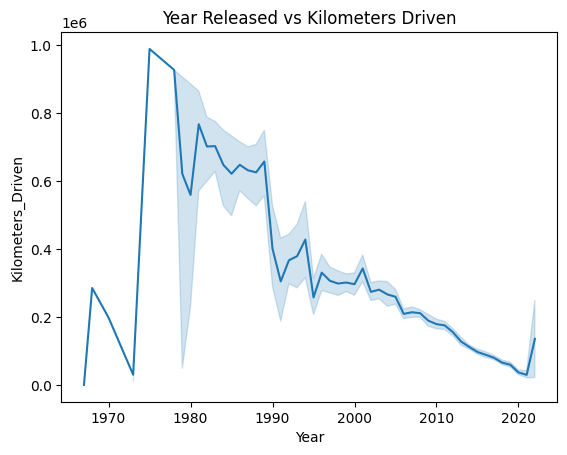

In [24]:
ax = sns.lineplot(x="Year",y="Kilometers_Driven",data=df)
ax.set_title("Year Released vs Kilometers Driven")

##### The above chart is what we would expect for a car Kilometers_Driven to be, as it gets older the Kilometers_Driven increases, so we would expect this to be normal.
#### The other i want to see is the unique values of each feature that has 2 possible values

In [25]:
columns = list(df.columns)
for col in columns:
    unique_list = df[col].unique()
    if len(unique_list) == 2:
        print(f'{col} Values: {unique_list}')

Licence Values: ['فلسطينية ' 'نمرة صفراء ']
Windows_Type Values: ['الكتروني ' 'يدوي ']
Payment_Method Values: ['نقدا فقط ' 'إمكانية التقسيط ']
Radio Values: [1 0]
Air_Conditioner Values: [1 0]
Central_Lock Values: [1 0]
Airbag Values: [1 0]
Magnesium_Rims Values: [1 0]
Alert_System Values: [1 0]
Leather_Seats Values: [1 0]
Sunroof Values: [1 0]


##### From the above breakdown of the features, we can see a few that has two categories which we can replace to zeros and ones (Binary)

The ones we want to binarize are "Licence", "Windows_Type", "Payment_Method"
##### Binarization

##### So lets Binarize the above features, 

for the "Licence" {1 for فلسطينية} {0 for نمرة صفراء}

for the "Windows_Type" {1 for الكتروني}{0 for يدوي}

for the "Payment_Method" {1 for نقدا فقط'}{0 for 'إمكانية التقسيط'}


In [26]:
df["Licence"] = df["Licence"].str.strip()
df["Licence"] = df["Licence"].map({
    "فلسطينية": 1,
    "نمرة صفراء": 0
})

df["Windows_Type"] = df["Windows_Type"].str.strip()
df["Windows_Type"] = df["Windows_Type"].map({
    "الكتروني": 1,
    "يدوي": 0
})

df["Payment_Method"] = df["Payment_Method"].str.strip()
df["Payment_Method"] = df["Payment_Method"].map({
    "نقدا فقط": 0,
    "إمكانية التقسيط": 1
})

In [27]:
df = df.rename(columns={
    "Licence":"Palestinian_Licence",
    "Windows_Type":"Electric_Windows",
    "Payment_Method":"Installment_Payment_Method"
    })
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Price,6546.0,NaN,NaN,NaN,67933.758631,57258.532914,1111.0,37000.0,55000.0,85000.0,999999.0
Brand,6546,39,فولكسفاجن,1105,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Model,6546,390,اوكتافيا,499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,6546.0,NaN,NaN,NaN,2009.019248,8.345239,1967.0,2006.0,2011.0,2015.0,2022.0
Color,6546,26,أبيض,1345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fuel_Type,6546,4,بنزين,3827,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle_History,6546,6,خصوصي,5609,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Palestinian_Licence,6546.0,NaN,NaN,NaN,0.989306,0.102863,0.0,1.0,1.0,1.0,1.0
Transmission_Type,6546,3,اوتوماتيك,3528,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Electric_Windows,6546.0,NaN,NaN,NaN,0.933394,0.249357,0.0,1.0,1.0,1.0,1.0


#### Now if recall the charts at the begining where we showed the skew, we can see the numerical features looking better with less skew, but there is still

##### 

Price


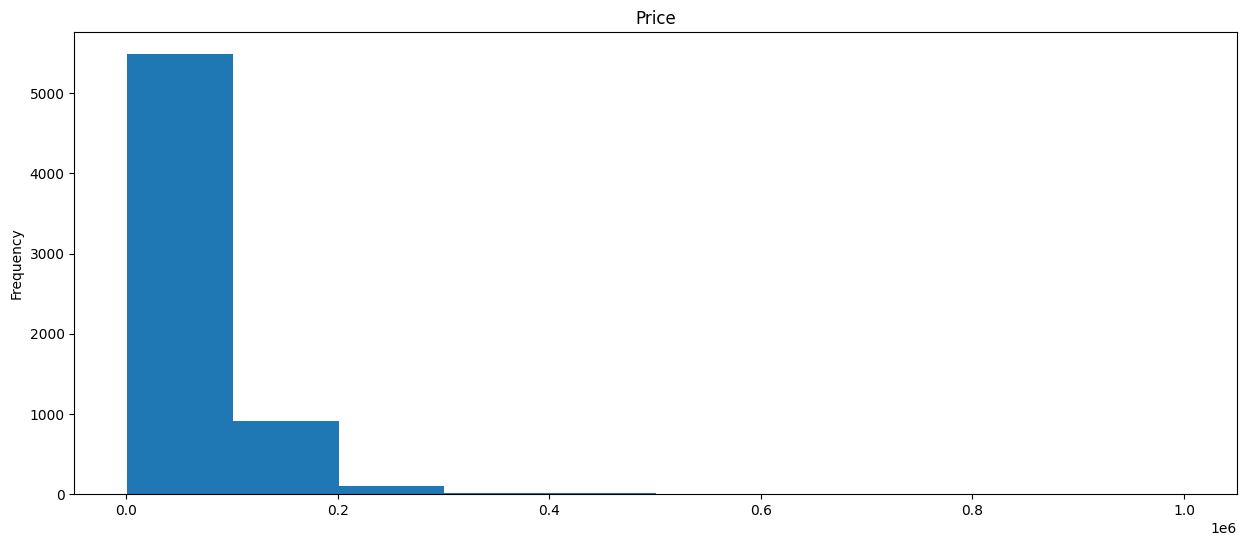

Year


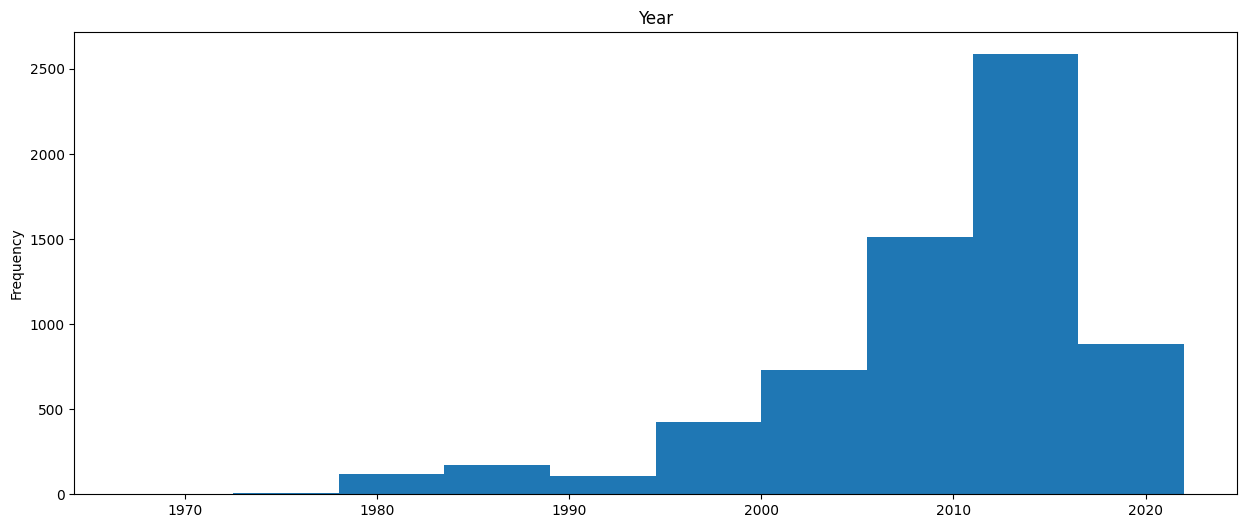

Engine_Capacity


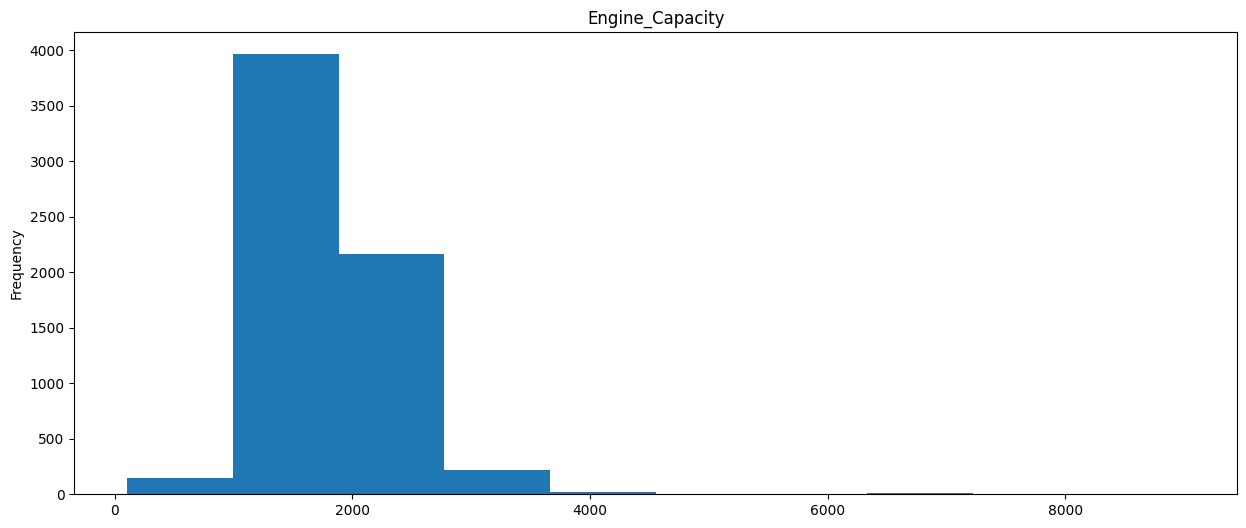

Kilometers_Driven


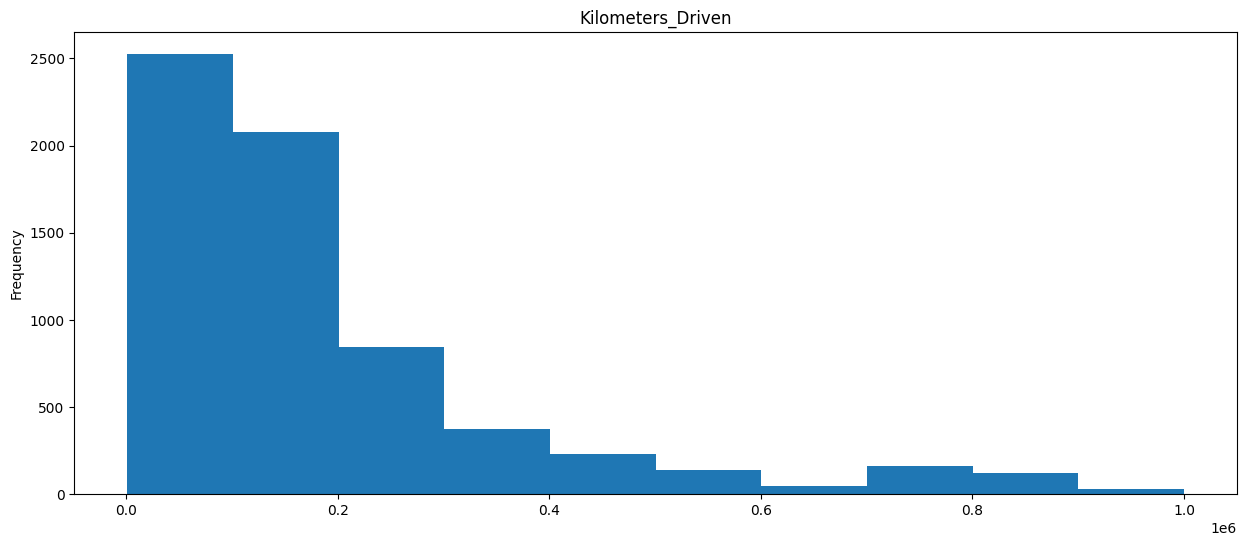

Seats


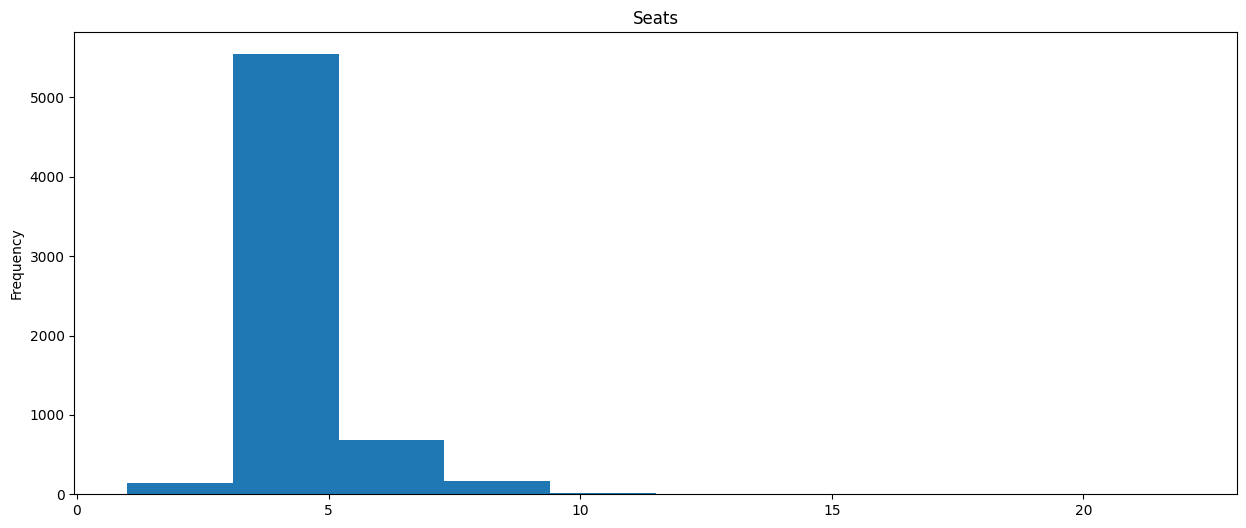

Previous_Owners


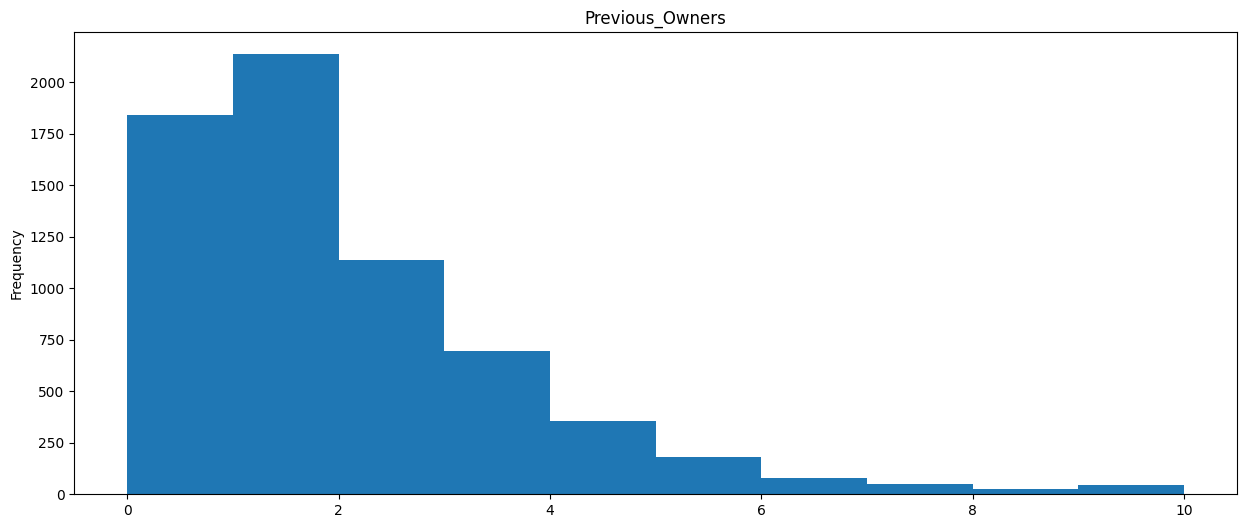

In [28]:
for col in numerical_cols:
    print(col)
    plt.figure(figsize = (15, 6))
    df[col].plot(kind="hist",title=col)
    plt.show()

#### From the charts above, what catches my eyes are the Kilometers_Driven and the Previous_Owners features, and i'll go over them below, the rest are as i would expect them to be

#### Kilometers_Driven
##### I want to damp down the values here and normalize them which would help to reduce the gap between its values and the other features (we'll see how that helps when we reach the "converting ctagories to numeric" step) and would also help with the skew a bit, so what i've chose is the ZScore method, so let's impliment it
##### The mean and the std should be exported to be used in the transformation of future data to predict

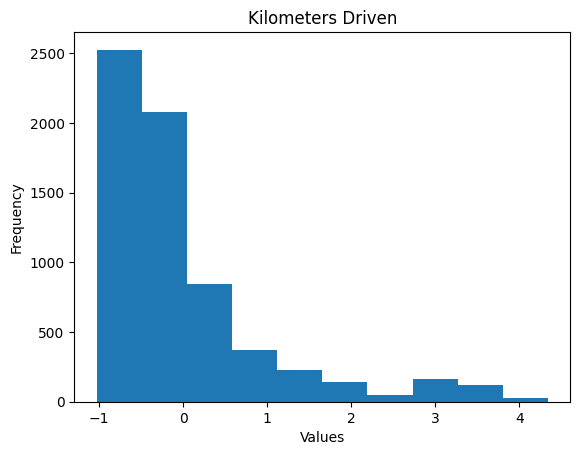

In [29]:
# l, optimal_lambda = stats.boxcox(np.array(df['Kilometers_Driven']))
# df['Kilometers_Driven_Lambda_Optimal'] = stats.boxcox(df['Kilometers_Driven'], lmbda=optimal_lambda)

df['Kilometers_Driven_ZScore'] = stats.zscore(df['Kilometers_Driven'])

mean_kilometers_driven = df['Kilometers_Driven_ZScore'].mean()
std_kilometers_driven = df['Kilometers_Driven_ZScore'].std()


df['Kilometers_Driven_ZScore'].plot(kind="hist",title="Kilometers Driven",xlabel="Values")

plt.show()

##### The above graph seems way better now, let's continue

#### Previous_Owners
##### I was thinking of doing some adaptive binning to this feature, but as of my experience in this field i have some ranges that people create in their minds about cars and these ranges are what i belive affect the price not the numerical ranges, so (As of my experience) i would make fixed ranges for the feature as follows (0-2),(3-4)(5 and above), so let's get to it

In [30]:
df['Previous_Owners_Ranges'] = pd.cut(df['Previous_Owners'], bins=[-1, 2, 4, 100], labels=['[0-2]', '[3-4]', '[5+)'])
df['Previous_Owners_Labels'] = pd.cut(df['Previous_Owners'], bins=[-1, 2, 4, 100], labels=[1, 2, 3])
df

,Price,Brand,Model,Year,Color,Fuel_Type,Vehicle_History,Palestinian_Licence,Transmission_Type,Electric_Windows,Engine_Capacity,Kilometers_Driven,Seats,Installment_Payment_Method,Listed_For,Previous_Owners,Radio,Air_Conditioner,Central_Lock,Airbag,Magnesium_Rims,Alert_System,Leather_Seats,Sunroof,Kilometers_Driven_ZScore,Previous_Owners_Ranges,Previous_Owners_Labels
0,100000,كيا,اوبتيما,2014,أبيض عاجي,بنزين,خصوصي,1,اوتوماتيك,1,2000,75000.0,5,0,للبيع فقط,0,1,1,1,1,1,1,1,1,-0.629108,[0-2],1
1,60000,كيا,سورينتو,2007,سكني,ديزل,خصوصي,1,نصف اوتوماتيك,1,2500,130000.0,8,1,للبيع أو التبديل,2,1,1,1,1,1,1,1,1,-0.333756,[0-2],1
2,43500,هونداي,افانتي,2006,سكني,بنزين,خصوصي,1,اوتوماتيك,1,1600,175154.0,5,0,للبيع فقط,1,1,1,1,1,1,1,1,1,-0.091277,[0-2],1
3,5500,فيات,127,1982,بيج,بنزين,خصوصي,1,عادي,0,906,844862.0,5,1,للبيع فقط,4,1,1,0,0,0,0,1,0,3.505080,[3-4],2
4,54000,بيجو,208,2014,فضي,بنزين,خصوصي,1,اوتوماتيك,1,1200,38000.0,5,0,للبيع فقط,0,0,1,1,1,1,1,0,0,-0.827799,[0-2],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6541,50000,كيا,سول,2012,أبيض,ديزل,خصوصي,1,اوتوماتيك,1,1600,249037.0,5,0,للبيع فقط,1,1,1,1,1,0,0,0,0,0.305478,[0-2],1
6542,45000,كيا,مورننغ,2015,فيراني,كهرباء,خصوصي,1,اوتوماتيك,1,1000,130000.0,5,1,للبيع فقط,2,0,1,1,1,1,1,0,0,-0.333756,[0-2],1
6543,48000,فورد,ترانزيت,2002,أبيض,ديزل,عمومي,1,عادي,1,2400,475435.0,8,0,للبيع فقط,5,1,0,0,0,0,0,0,0,1.521243,[5+),3
6544,87000,بيجو,بارتنر,2018,فضي,ديزل,خصوصي,1,عادي,1,1600,50000.0,5,0,للبيع فقط,0,1,1,1,1,0,1,0,0,-0.763359,[0-2],1


### Now all we've done is based on the analysis so far, now i we're going to do jump into more complex feature engineering, which i can do here, but i prefer to do it in a seperate notebook for much more organized structure

In [31]:
df.to_csv("improved_training_data_A.csv",index=False)